### Import libraries

In [1]:
# Import required libraries
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from docx import Document

### Customization 

In [2]:
# Customization parameters
my_input_file = "0302 input_cost_data.csv"

#specify variables 
dependent_var = 'Overhead_Cost'  
independent_vars = ['Labor_Hours', 'Machine_Hours', 'Number_of_Setups', 'Batch_Size', 'Material_Movements']  

#specify output files
my_residual_plot = "0302 residuals_vs_fitted.png"
my_actual_vs_predicted = "0302 actual_vs_predicted.png"
my_model_output = "0302 regression_results.csv"
my_word_output = "0302 Regression_Overhead_Cost_Report.docx"

### Load and prepare data 

In [3]:
# Load Input File 
df = pd.read_csv(my_input_file)

# Prepare Data for Regression 
X = df[independent_vars]
y = df[dependent_var]

# Comment this line out to force zero intercept 
X = sm.add_constant(X)

### Fit and display regression equation 

In [4]:
# Fit Regression Model 
model = sm.OLS(y, X).fit()

# Regression Equation 
params = model.params
equation = f"{dependent_var} = {params['const']:.2f}"
for var in independent_vars:
    coef = params[var]
    sign = '+' if coef >= 0 else '-'
    equation += f" {sign} {abs(coef):.2f} * {var}"

# Display Model Equation
print("\nModel Equation:")
print(equation)

print("\nModel Fit Summary:")
print(f"R-squared: {model.rsquared:.4f} --> Explains {model.rsquared*100:.2f}% of the variation in overhead cost.")
print(f"Adjusted R-squared: {model.rsquared_adj:.4f} --> Adjusted for number of predictors.")
print(f"F-statistic: {model.fvalue:.2f} with p-value {model.f_pvalue:.4f} --> Indicates overall significance of the model.")


Model Equation:
Overhead_Cost = 12359.95 + 12.08 * Labor_Hours + 12.92 * Machine_Hours + 1471.57 * Number_of_Setups - 18.56 * Batch_Size + 285.23 * Material_Movements

Model Fit Summary:
R-squared: 0.2443 --> Explains 24.43% of the variation in overhead cost.
Adjusted R-squared: 0.2041 --> Adjusted for number of predictors.
F-statistic: 6.08 with p-value 0.0001 --> Indicates overall significance of the model.


### Diagnostic Plot 

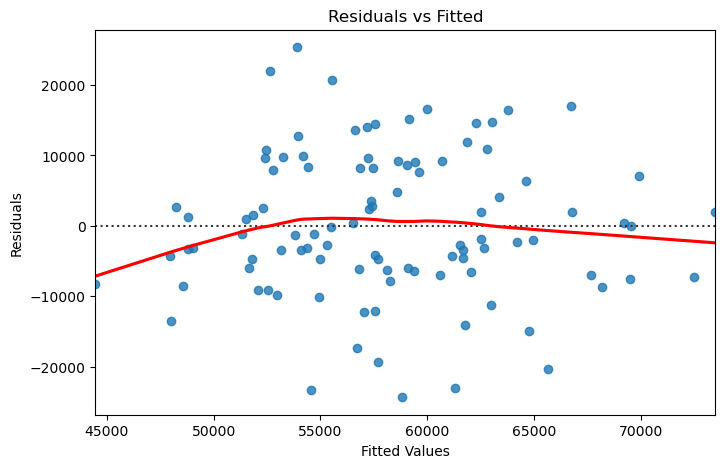

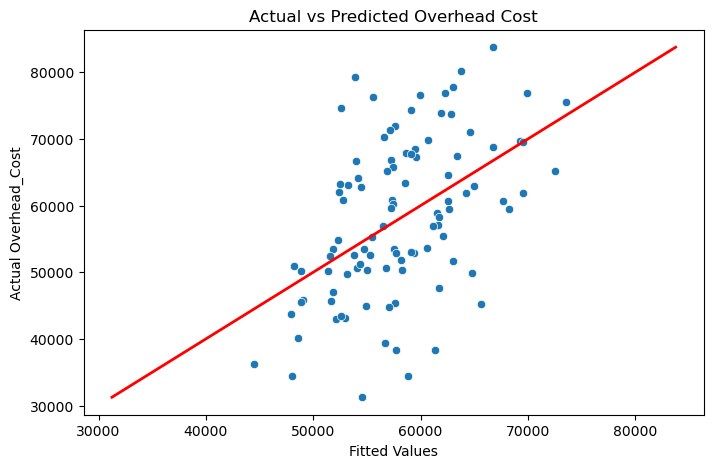

In [5]:
# Diagnostic Plots 
residuals = model.resid
fitted = model.fittedvalues

# Residuals vs Fitted Plot
plt.figure(figsize=(8, 5))
sns.residplot(x=fitted, y=residuals, lowess=True, line_kws={'color': 'red'})
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted')
plt.savefig(my_residual_plot)
plt.show()

# Actual vs Predicted Plot
plt.figure(figsize=(8, 5))
sns.scatterplot(x=fitted, y=y)
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', lw=2)
plt.xlabel('Fitted Values')
plt.ylabel(f'Actual {dependent_var}')
plt.title('Actual vs Predicted Overhead Cost')
plt.savefig(my_actual_vs_predicted)
plt.show()

### Export results

In [6]:
# Export Results to CSV 

summary_df = pd.DataFrame({
    'Variable': params.index,
    'Coefficient': model.params.values,
    'P-Value': model.pvalues.values
})
summary_df.to_csv(my_model_output, index=False)

# Generate Word Report 
doc = Document()
doc.add_heading('Regression Analysis Report: Overhead Cost Drivers', 0)

doc.add_heading('Regression Equation', level=1)
doc.add_paragraph(equation)

doc.add_heading('Model Fit Statistics', level=1)
doc.add_paragraph(f"R-squared: {model.rsquared:.4f} — Explains {model.rsquared*100:.2f}% of variance in overhead cost.")
doc.add_paragraph(f"Adjusted R-squared: {model.rsquared_adj:.4f} — Adjusted for number of predictors.")
doc.add_paragraph(f"F-statistic: {model.fvalue:.2f}")
doc.add_paragraph(f"Prob (F-statistic): {model.f_pvalue:.4f} — Indicates overall model significance.")

doc.add_heading('Variable Significance (p-values)', level=1)
for var, pval in model.pvalues.items():
    significance = 'Significant' if pval < 0.05 else 'Not Significant'
    doc.add_paragraph(f"{var}: p-value = {pval:.4f} ({significance})")

doc.add_heading('Business Interpretation', level=1)
doc.add_paragraph(
    "The regression results help identify which operational variables are statistically significant in explaining the overhead costs. "
    "Significant drivers can be used as allocation bases under ABC, improving cost attribution accuracy. "
    "Non-significant variables may be excluded from ABC models to reduce noise and complexity."
)

# Save Word Report
doc.save(my_word_output)


### Confirm output generation

In [7]:
# Output Summary 
print("\nFiles Generated:")
print(f"Word Report: {my_word_output}")
print(f"CSV File: {my_model_output}")
print(f"Residual Plot: {my_residual_plot}")
print(f"Actual vs Predicted Plot: {my_actual_vs_predicted}")


Files Generated:
Word Report: 0302 Regression_Overhead_Cost_Report.docx
CSV File: 0302 regression_results.csv
Residual Plot: 0302 residuals_vs_fitted.png
Actual vs Predicted Plot: 0302 actual_vs_predicted.png
